In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv("dataset/train.csv")
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

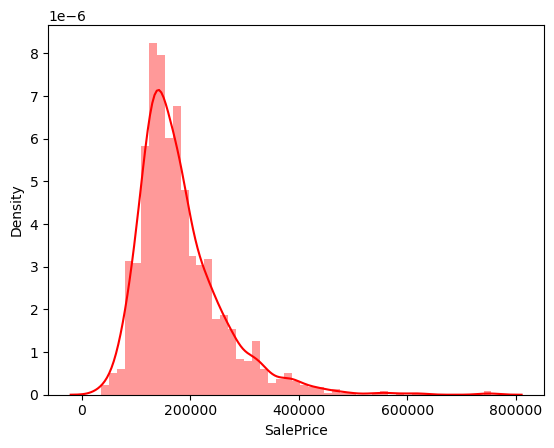

In [6]:
sns.distplot(df_train['SalePrice'],color='red')
plt.show()

In [7]:
##Finding Skewness and Kurtosis

df_train['SalePrice'].skew(), df_train['SalePrice'].kurt()

(1.8828757597682129, 6.536281860064529)

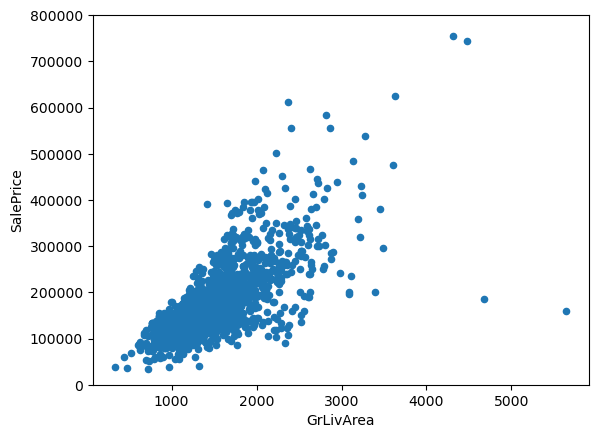

In [8]:
data = pd.concat([df_train['SalePrice'],df_train['GrLivArea']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice',ylim=(0,800000))
plt.show()

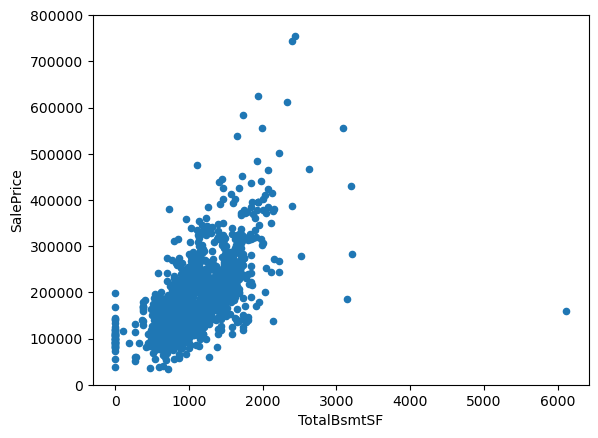

In [9]:
data = pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']],axis=1)
data.plot.scatter(x='TotalBsmtSF',y='SalePrice',ylim=(0,800000))
plt.show()

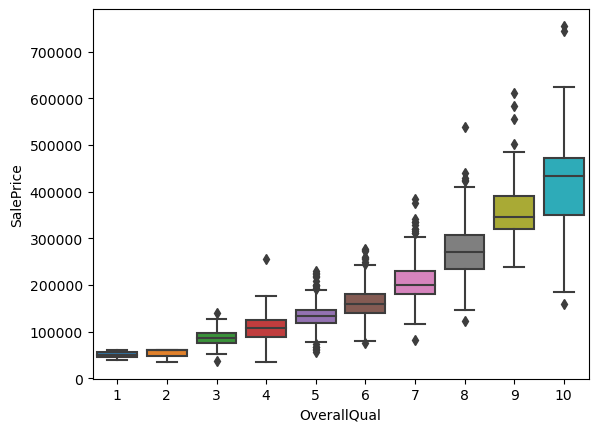

In [10]:
data = pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis=1)
sns.boxplot(x='OverallQual',y='SalePrice',data=data)
plt.show()

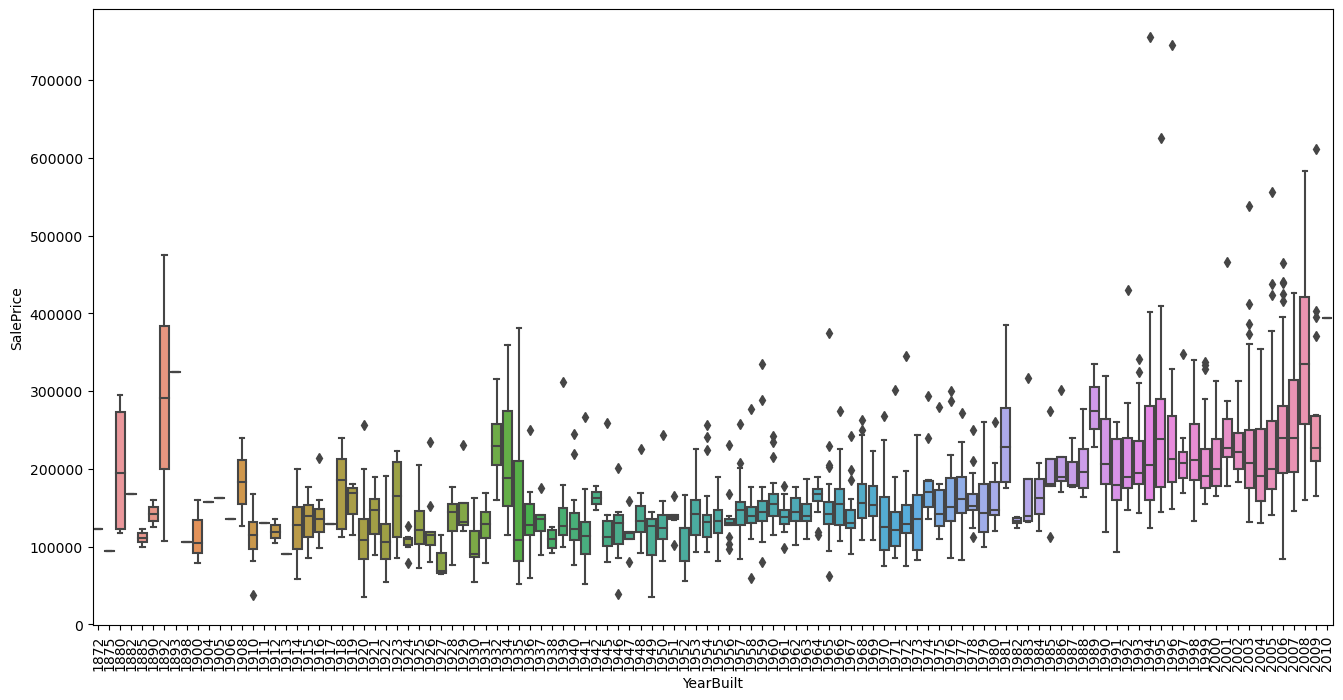

In [11]:
data = pd.concat([df_train['SalePrice'],df_train['YearBuilt']],axis=1)
f,ax = plt.subplots(figsize=(16,8))
f = sns.boxplot(x='YearBuilt',y='SalePrice',data=data)
plt.xticks(rotation = 90)
plt.show()

### Correlation Matrix

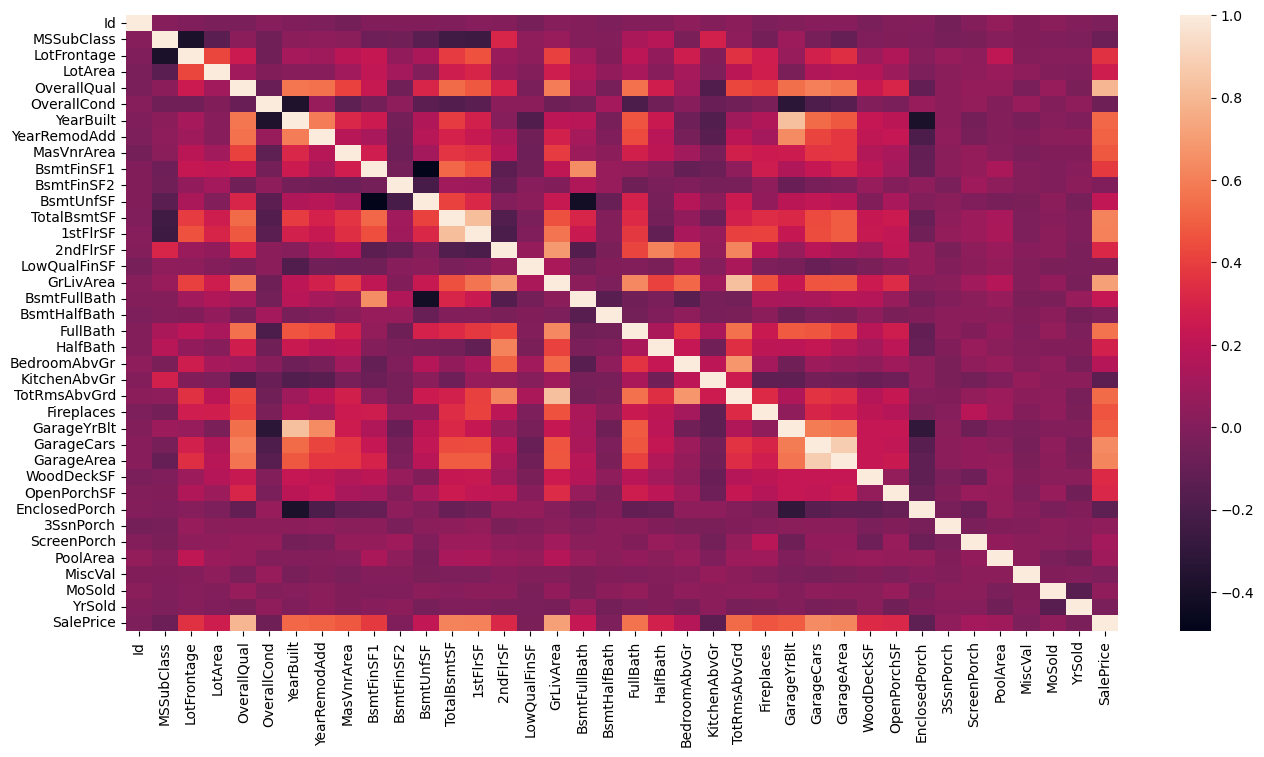

In [12]:
corr_mat = df_train.corr()
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_mat)

plt.show()

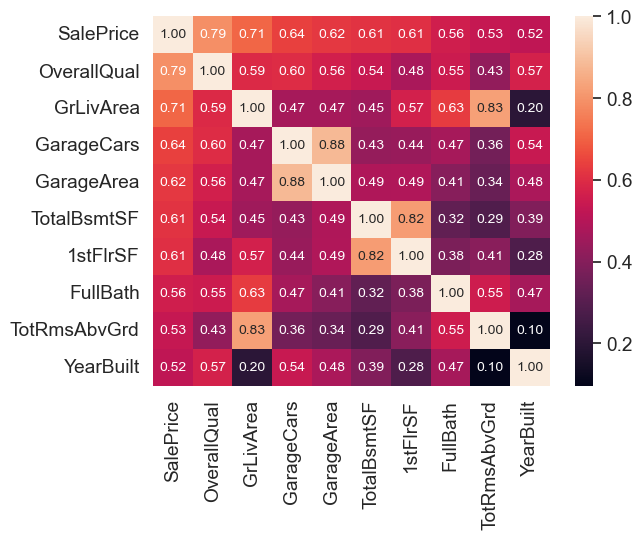

In [13]:
k=10
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, annot=True,annot_kws={'size':10},fmt='0.2f',yticklabels=cols.values, xticklabels=cols.values)
plt.show()

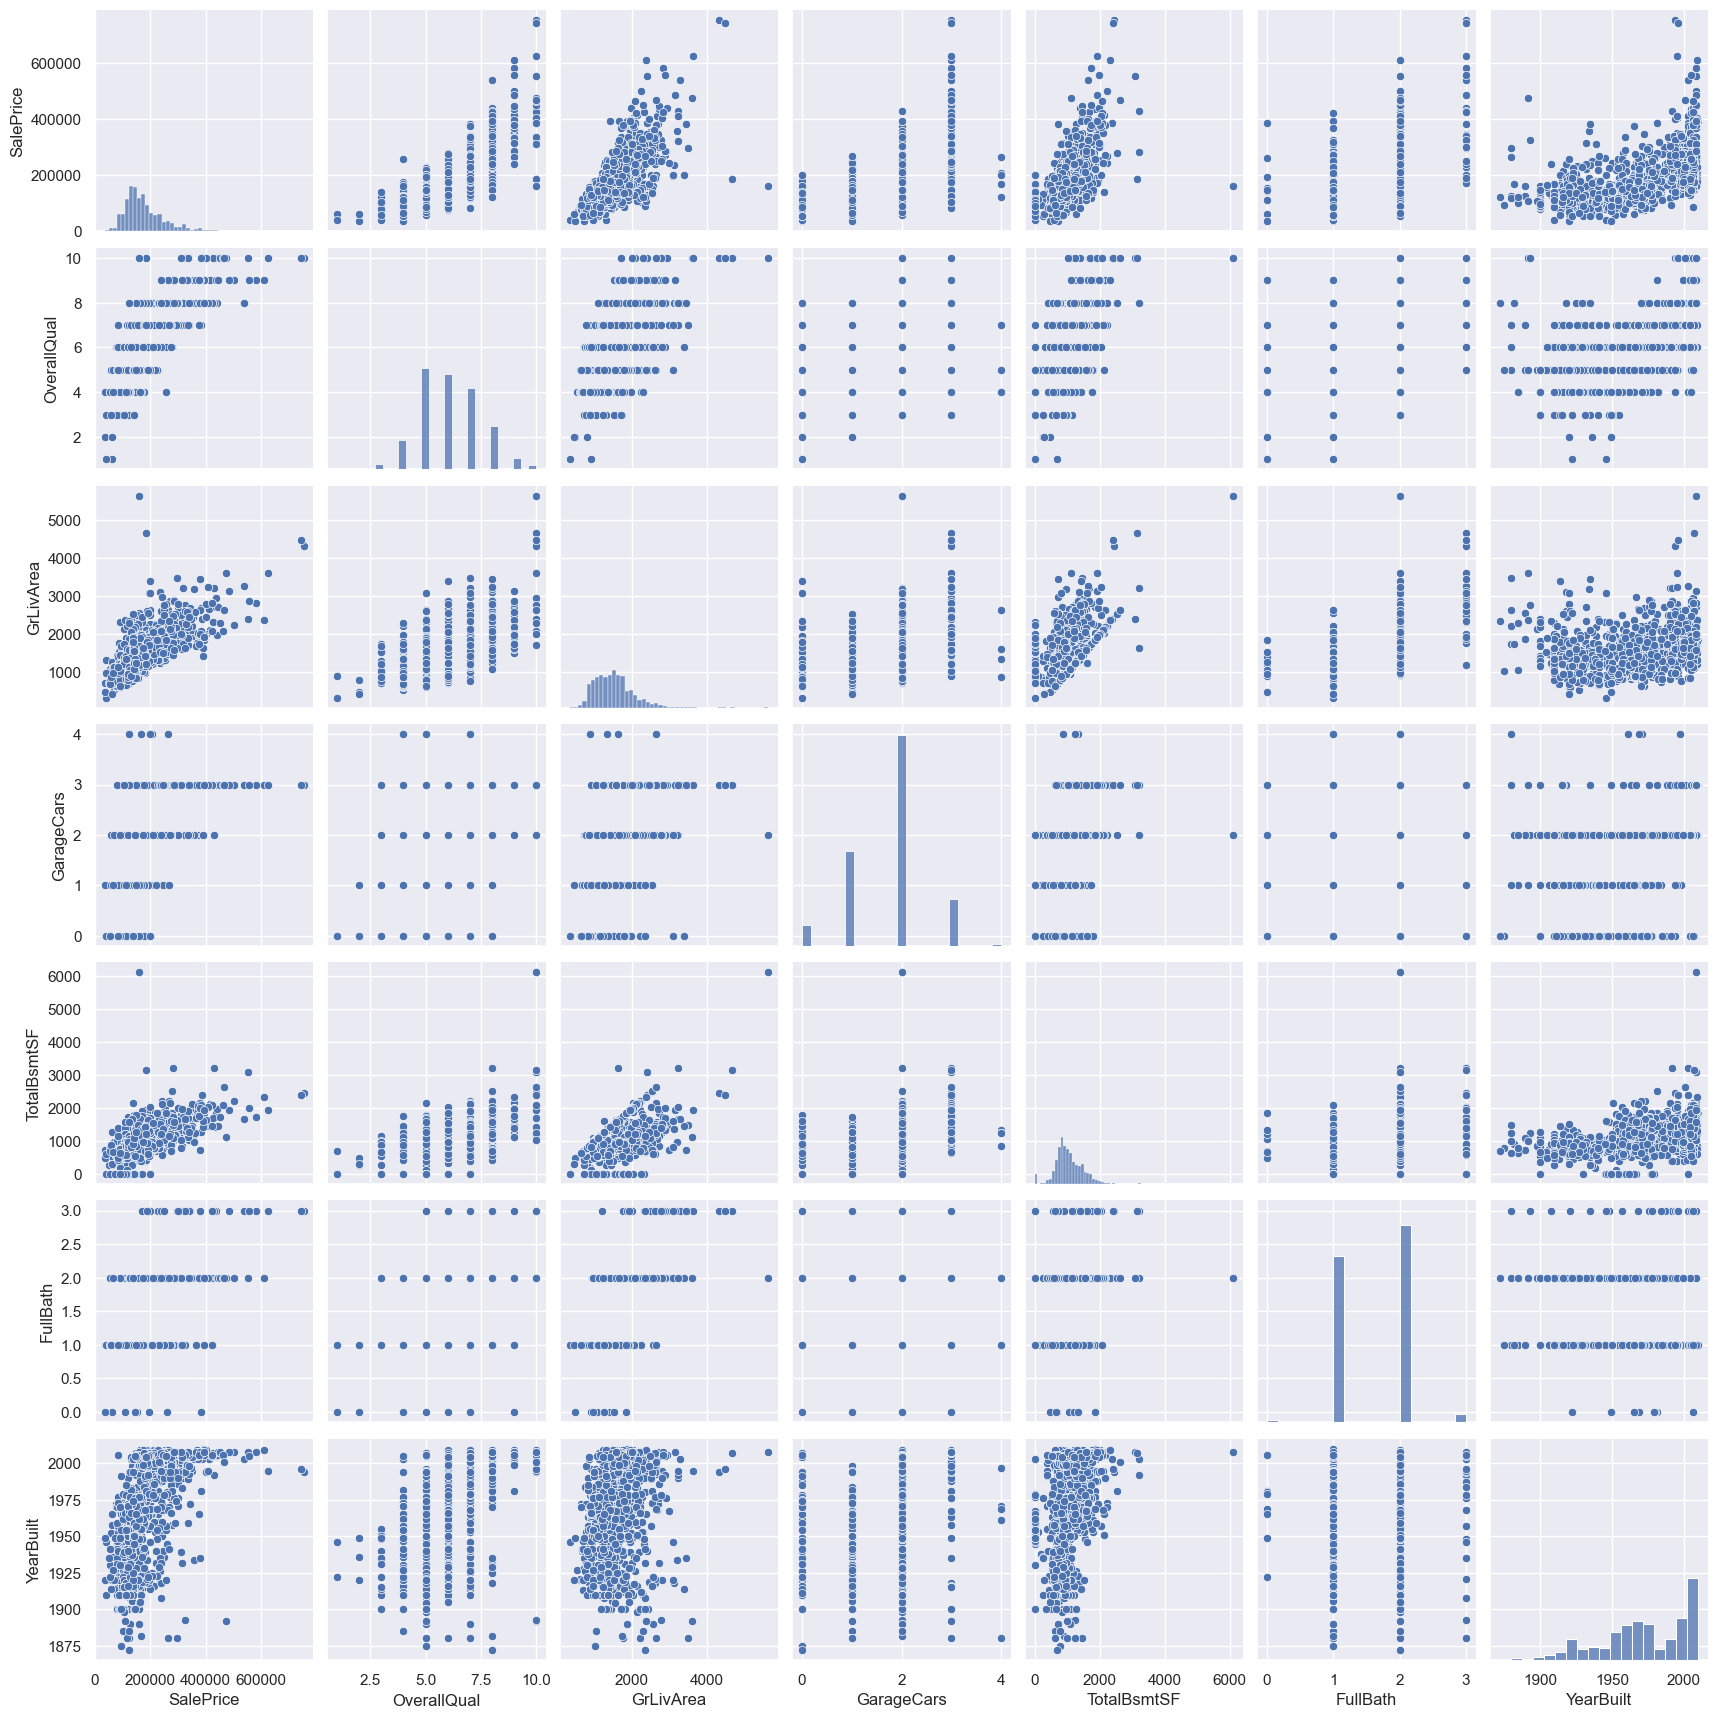

In [14]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols],size=2.5)
plt.show()

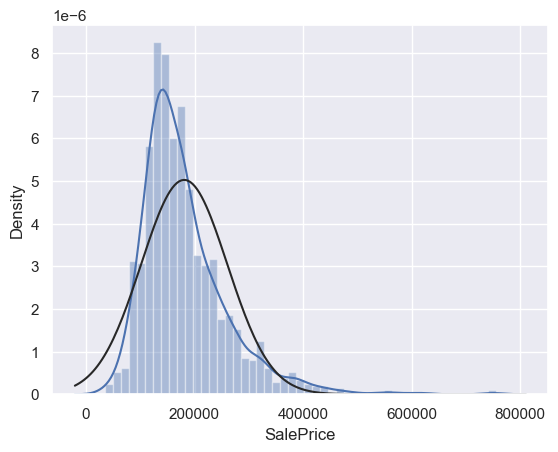

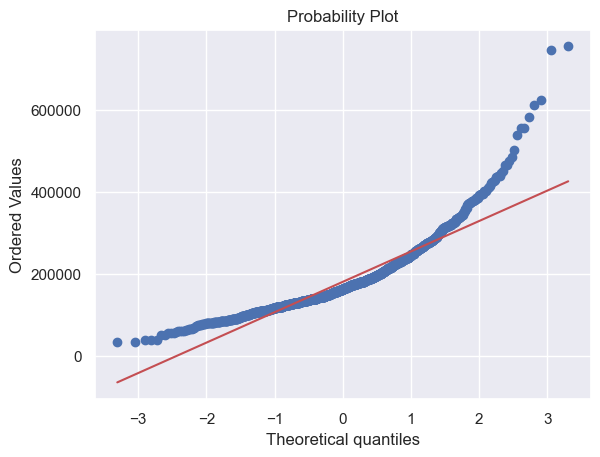

In [15]:
sns.distplot(df_train['SalePrice'], fit=norm)
fig=plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)

In [16]:
df_train['SalePrice']= np.log(df_train['SalePrice'])

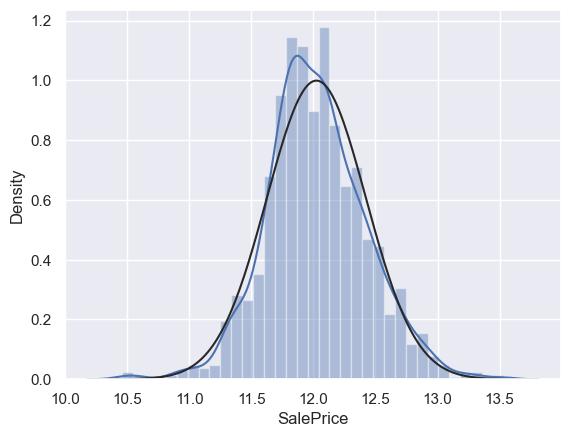

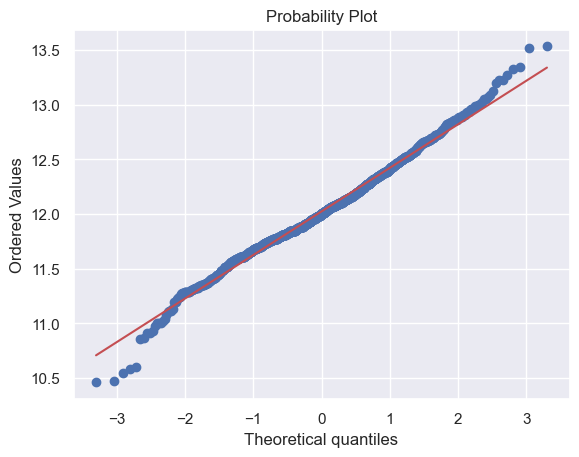

In [17]:
sns.distplot(df_train['SalePrice'], fit=norm)
fig=plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)

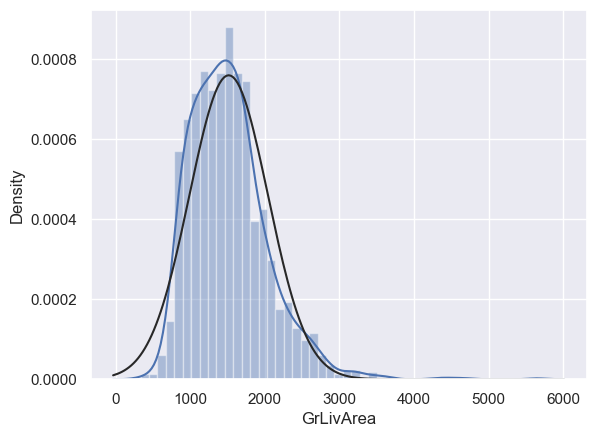

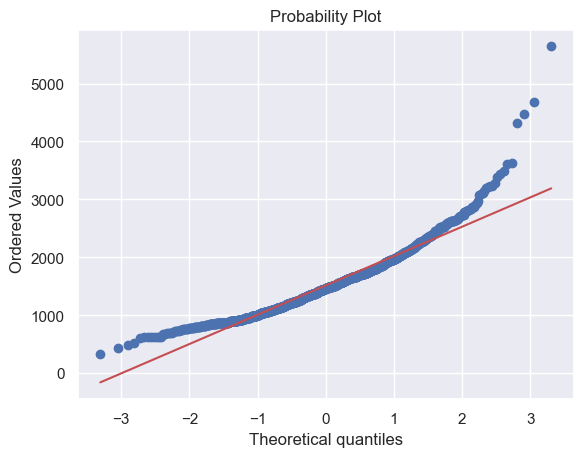

In [18]:
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [19]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

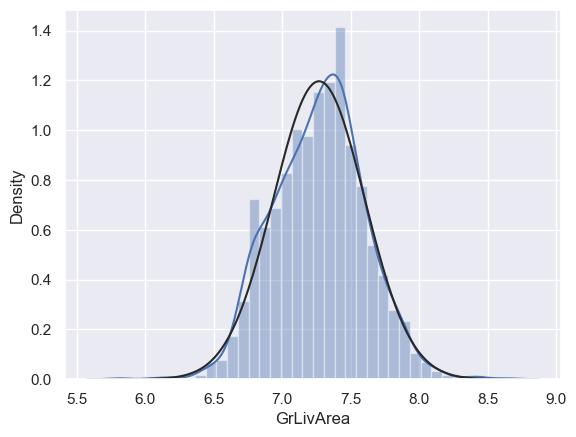

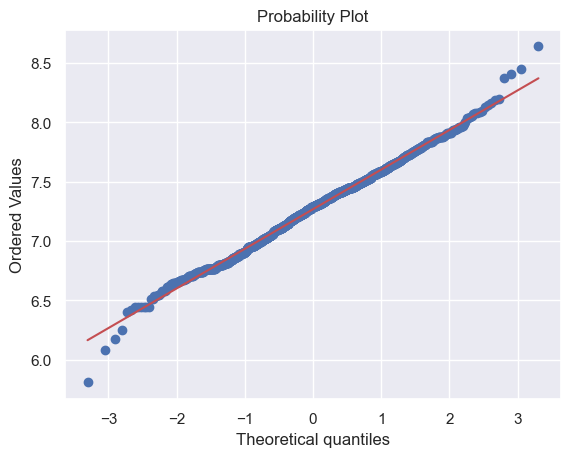

In [20]:

sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

### Missing Values

In [21]:
feat = corr_mat[corr_mat['SalePrice']>0.3].index
feat

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [22]:
df_train = df_train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

In [23]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
FullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


In [24]:
df_train = df_train.drop((missing_data[missing_data['Total']>81]).index,1)

In [25]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())
total = df_train.isnull().sum().sort_values(ascending=False)
total

OverallQual     0
YearBuilt       0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
SalePrice       0
dtype: int64

In [26]:
# Categorical

cat_feature_mask = df_train.dtypes==object

cat_cols = df_train.columns[cat_feature_mask].tolist()
cat_cols

[]

In [27]:
# No categorical value, if there then it can be replaced by dummy variables

# data = pd.get_dummies(data, columns = cat_cols)

In [28]:
df_train.shape

(1460, 18)

In [29]:
from sklearn.model_selection import train_test_split

X = df_train.drop('SalePrice',axis=1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [30]:
from sklearn.preprocessing import StandardScaler

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [31]:
X_train

array([[-0.83213659, -1.53621129, -1.69386273, ..., -0.13138306,
        -0.76365784, -0.71864498],
       [-0.83213659, -0.61273541, -1.5484224 , ..., -0.96558134,
        -0.2370651 , -0.71864498],
       [ 1.35409374,  1.10229122,  1.02102334, ...,  1.73629422,
         1.15122485,  1.60854519],
       ...,
       [ 2.08283718,  1.20123506,  1.11798355, ...,  1.7594664 ,
         0.24165557,  0.27872223],
       [ 0.62535029, -1.7011177 ,  0.14838139, ..., -0.71532186,
        -0.76365784, -0.71864498],
       [ 1.35409374,  1.1352725 ,  1.02102334, ...,  1.27285073,
         0.64856814,  0.39961523]])

In [32]:
X_test

array([[-0.71365421, -0.52019343, -0.51752894, ..., -0.03096797,
        -0.7257455 ,  5.6303742 ],
       [ 0.71365421,  1.18663395,  1.03108028, ...,  0.53539739,
         1.0003243 ,  1.15236061],
       [-0.71365421, -0.55366063, -1.4854097 , ..., -0.89011541,
        -0.7257455 , -0.67201529],
       ...,
       [-0.71365421, -0.18552139, -0.95307528, ...,  0.20901735,
        -0.7257455 , -0.67201529],
       [ 1.42730841,  0.7180931 ,  0.74071605, ...,  0.38660649,
        -0.7257455 , -0.17445823],
       [-0.71365421, -1.49074233, -1.67898585, ..., -2.21003467,
        -0.7257455 , -0.67201529]])

In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [34]:
lm

LinearRegression()

In [35]:
lm.fit(X_train,y_train)

LinearRegression()

In [36]:
pred = lm.predict(X_test)
pred = pred.reshape(-1,1)

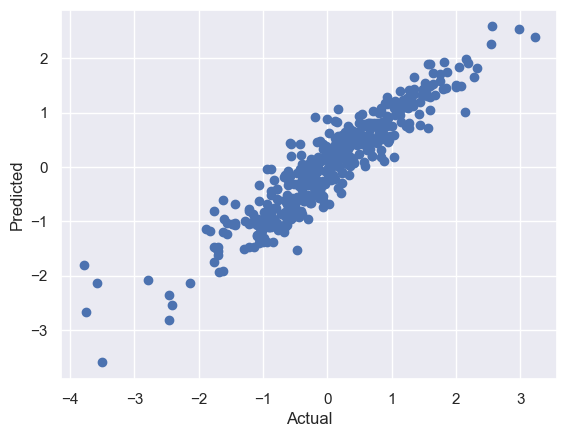

In [37]:
plt.scatter(y_test, pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

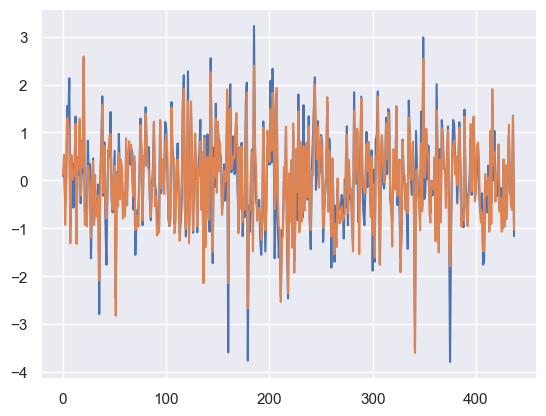

In [38]:
plt.plot(y_test, label='Actual')
plt.plot(pred, label='Predicted')
plt.show()

In [39]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, pred))

0.3651138276679626

In [40]:
from sklearn import ensemble

params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.05, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='ls', max_depth=4)

In [41]:
clf_pred = clf.predict(X_test)
clf_pred = clf_pred.reshape(-1, 1)

In [42]:
np.sqrt(metrics.mean_squared_error(y_test, clf_pred))

0.37300202739297184

In [43]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [44]:
svr_pred = svr.predict(X_test)
svr_pred = svr_pred.reshape(-1, 1)

In [45]:
np.sqrt(metrics.mean_squared_error(y_test, svr_pred))

0.4280587537307915